In [1]:
import sys
sys.path.append('./helpers')
import loadmat as lm
import glob
import os
from collections import Counter
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
files = glob.glob('Z:/giocomo/attialex/speed_sort4/*.mat')

In [3]:

ii=0
for iF in files:
    
    dat = lm.loadmat(iF)
    
    if ii>0:
        delays = np.concatenate((delays,dat['data']['delay']),1)
        region = np.concatenate((region,dat['data']['region']))
    else:
        delays = dat['data']['delay']
        region = dat['data']['region']
    ii=ii+1

In [4]:
reg = [str(r) for r in region]
reg = ['RSP' if el.startswith('RS') else el for el in reg]

In [6]:
idx =  [i for i, x in enumerate(reg) if (x == 'MEC' or x=='VISp' or x=='RSP') and delays[1,i]>0.1]
rr =  [x for i, x in enumerate(reg) if (x == 'MEC' or x=='VISp' or x=='RSP') and delays[1,i]>0.1]

In [8]:
dataset = pd.DataFrame({'region': rr,'shift':delays[0,idx]})

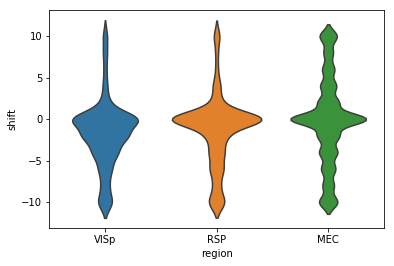

In [9]:
ax = sns.violinplot(x="region", y="shift", data=dataset, inner=None)
#ax = sns.swarmplot(x="region", y="shift", data=dataset)

In [10]:
unique_elements, counts_elements = np.unique(reg, return_counts=True)
p={a:b for (a,b) in zip(unique_elements,counts_elements)}

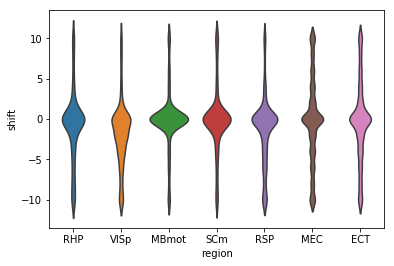

In [11]:
idx =  [i for i, x in enumerate(reg) if p[x] >500 and delays[1,i]>0.1]
rr =  [x for i, x in enumerate(reg) if p[x] >500 and delays[1,i]>0.1]
dataset = pd.DataFrame({'region': rr,'shift':delays[0,idx]})
ax = sns.violinplot(x="region", y="shift", data=dataset, inner=None)

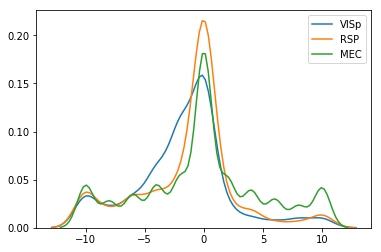

In [19]:
regions =['VISp','RSP','MEC']
for r in regions:
    idx =  [i for i, x in enumerate(reg) if x==r and delays[1,i]>0.1]
    sns.kdeplot(delays[0,idx],label=r)


C:\Users\attialex\AppData\Local\Continuum\anaconda3\envs\panda3d\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


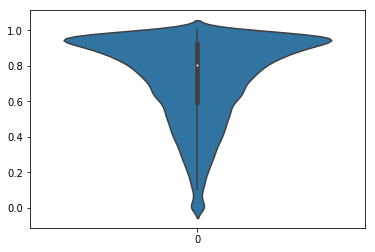

In [184]:
sns.violinplot(data=delays[1,:])